# Ejemplo con los pasos básicos de un EDA

A continuación mostramos los pasos de un EDA con el popular dataset de Titanic.

## Cargar el conjunto de datos

In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Tenemos varios tipos de variables:


*   Numéricas como age, fare, sibsp, parch
*   Categóricas como survived, pclass, sex, embarked, class, who, adult_male, deck, embark_town, alive y alone


Para conocer el significado de las variables, debemos ir a la [descripción del dataset](https://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf).



## Summary Statistics

Summary statistics para las columnas numéricas

In [ ]:
print(titanic.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Podemos ver que se consideran numéricas todas las variables que están codificadas con números. Incluso para "survived", que realmente es una variable booleana, o pclass, que es categórica. Debemos tener cuidado con esto.

In [ ]:
titanic["survived"] = titanic["survived"].astype(bool)
titanic["pclass"] = titanic["pclass"].astype("category")

Información sobre el dataset, incluyendo tipos de datos y contar valores no nulos

In [ ]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    bool    
 1   pclass       891 non-null    category
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(3), category(3), float64(2), int64(2), object(5)
memory usage: 68.6+ KB
None


Vemos que hay 891 registros, los tipos de variables, y dónde hay valores faltantes (age, deck, embark_town).

## Valores faltantes

Vamos a solucionar los problemas de los valores faltantes. Usaremos una técnica rápida y aprenderemos más sobre esto en el módulo de Minería de Datos.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


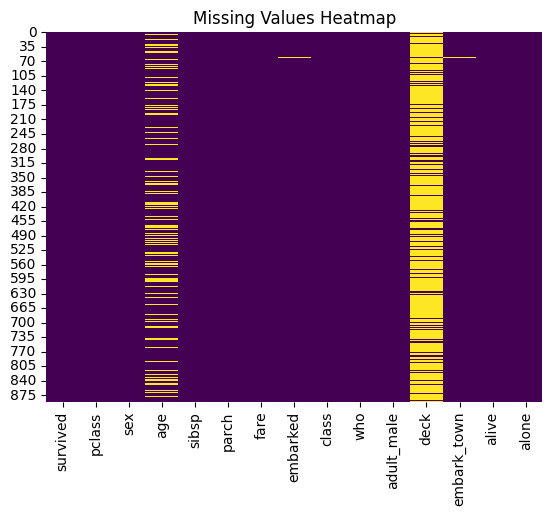

In [ ]:
import matplotlib.pyplot as plt

# Identificar valores faltantes
missing_values = titanic.isnull().sum()
print(missing_values)

# Visualizarlos
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()





*   Los valores faltantes de variables numéricas podemos inputarlos con el valor de la mediana.
*   Los valores faltantes de variables categóricas podemos impoutarlos con el valor de la moda.
*   Si alguna variable tiene demasiados valores faltanes, podemos eliminarla



In [ ]:
# Imputar valores faltantes numéricos con mediana
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Imputar valores faltantes categóricos con moda
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)
# Eliminar la columna 'deck' porque tiene demasiados valores faltantes
titanic.drop(columns=['deck'], inplace=True)

# Verificación final
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


## Análisis de Correlaciones

A continuación, podemos hacer un análisis de correlaciones de las variables numéricas y booleanas

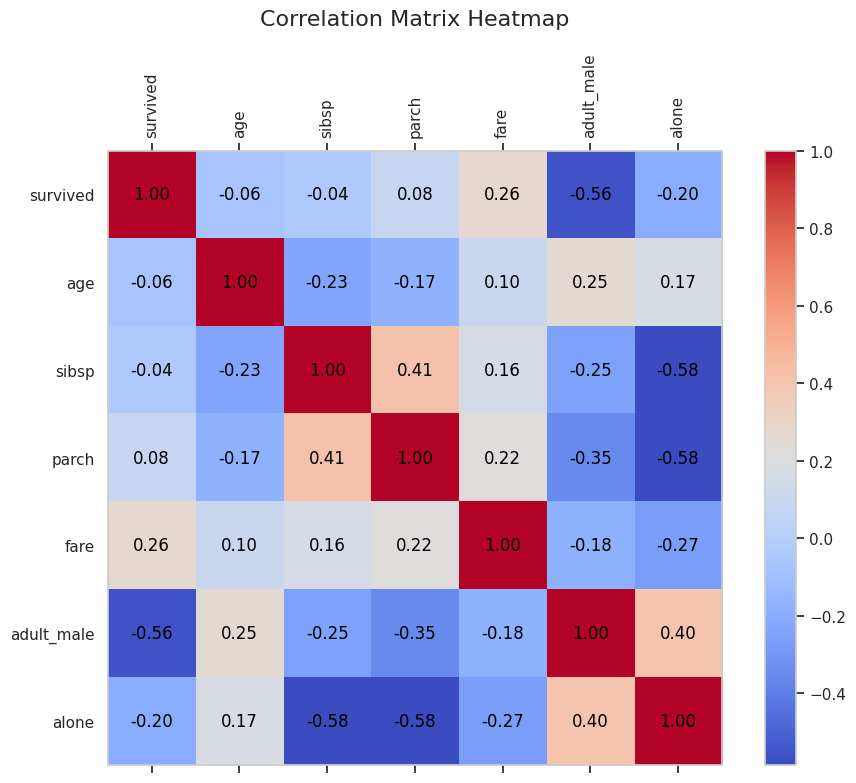

In [ ]:
# Seleccionar variables numéricas y booleanas
numerical_cols = titanic.select_dtypes(include=['number', 'bool']).copy()

# Convertir variables booleanas a enteros (True=1, False=0)
boolean_cols = numerical_cols.select_dtypes(include=['bool']).columns
numerical_cols[boolean_cols] = numerical_cols[boolean_cols].astype(int)

# Computar la matriz de correlación (para las variables numéricas)
corr_matrix = numerical_cols.corr()
print(corr_matrix)

# Display con seaborn

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# # Crear el heatmap con matplotlib
# fig, ax = plt.subplots(figsize=(10, 8))

# # Crear un mapa de color para el heatmap
# cax = ax.matshow(corr_matrix, cmap='coolwarm')

# # Añadir anotaciones con los valores de correlación
# for (i, j), val in np.ndenumerate(corr_matrix):
#     ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# # Añadir la barra de color
# fig.colorbar(cax)

# # Establecer los nombres de los ejes
# ax.set_xticks(np.arange(len(corr_matrix.columns)))
# ax.set_yticks(np.arange(len(corr_matrix.columns)))
# ax.set_xticklabels(corr_matrix.columns, rotation=90)
# ax.set_yticklabels(corr_matrix.columns)

# ax.grid(False)

# # Título del gráfico
# plt.title('Correlation Matrix Heatmap', pad=20, fontsize=16)

# # Mostrar el gráfico
# plt.tight_layout()
# plt.show()




*   La supervivencia se correlaciona con fare (lo que pagó el pasajero). Así que pasajeros que pagaron más, sobrevivieron más.
*   Y se correlaciona negativamente con si el pasajero era un adulto varón.



## Visualizar distribuciones y relaciones

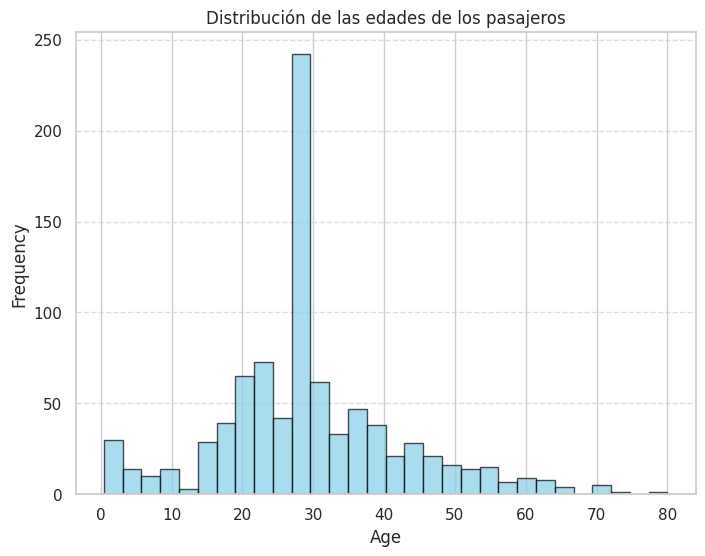

In [ ]:
# aesthetics
# sns.set(style="whitegrid")

# 1. Histograma de Age
plt.figure(figsize=(8, 6))
plt.hist(titanic['age'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de las edades de los pasajeros')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


La mayoría de los pasajeros tiene entre 20 y 40 años, indicando que la población a bordo del Titanic estaba compuesta principalmente por adultos jóvenes.

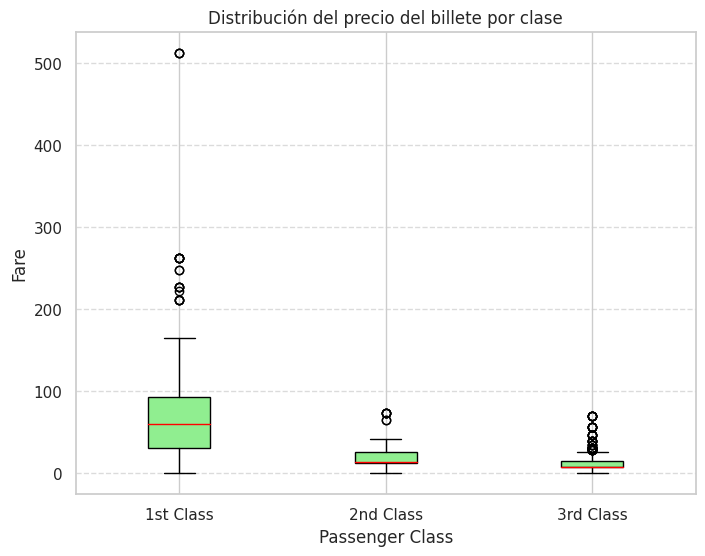

In [ ]:

# 2. Box Plot de Fare dividido entre Pclass (la clase del pasagero)
# Con seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', data=titanic, palette='Set2')
plt.title('Distribución del precio del billete por clase')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()
# plt.figure(figsize=(8, 6))
# classes = [1, 2, 3]
# fares = [titanic[titanic['pclass'] == cls]['fare'].dropna() for cls in classes]
# plt.boxplot(fares, labels=['1st Class', '2nd Class', '3rd Class'], patch_artist=True,
#             boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='red'))

# plt.title('Distribución del precio del billete por clase')
# plt.xlabel('Passenger Class')
# plt.ylabel('Fare')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


Los pasajeros de primera clase pagaron precios más altos

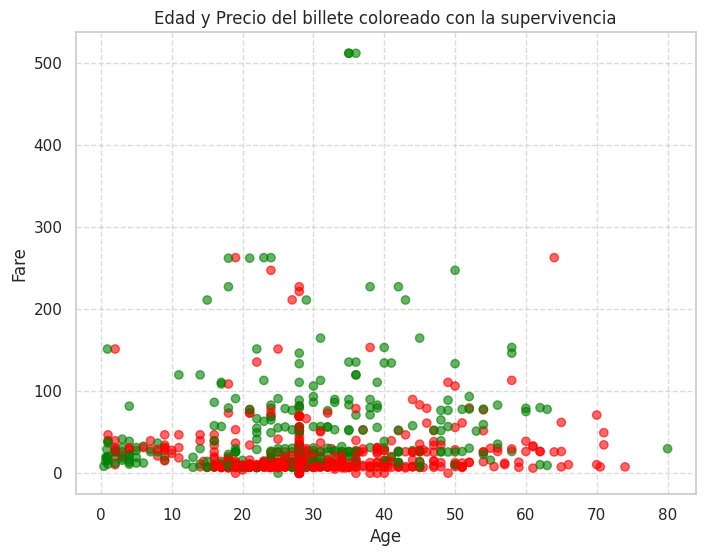

In [ ]:

# 3. Gráfico de dispersión Age vs. Fare


plt.figure(figsize=(8, 6))
colors = {False: 'red', True: 'green'}
plt.scatter(titanic['age'], titanic['fare'], c=titanic['survived'].map(colors), alpha=0.6)
plt.title('Edad y Precio del billete coloreado con la supervivencia')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Con seaborn
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='age', y='fare', hue='survived', data=titanic, palette='viridis')
# plt.title('Edad y Precio del billete coloreado con la supervivencia')
# plt.xlabel('Age')
# plt.ylabel('Fare')
# plt.show()


Los pasajeros que pagaron tarifas más altas (mayoritariamente de primera clase) parecen haber tenido una mayor tasa de supervivencia

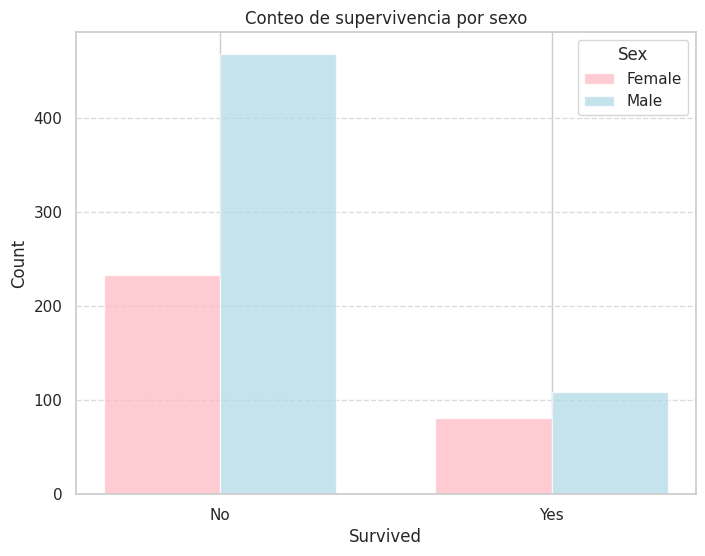

In [ ]:
import numpy as np

# 4. Contar el número de Survival por Sex
# Con seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=titanic, palette='pastel')
plt.title('Conteo de supervivencia por sexo')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# plt.figure(figsize=(8, 6))
# male_counts = titanic[titanic['sex'] == 'male']['survived'].value_counts()
# female_counts = titanic[titanic['sex'] == 'female']['survived'].value_counts()

# bar_width = 0.35
# index = np.arange(2)

# plt.bar(index, female_counts, bar_width, label='Female', color='lightpink', alpha=0.7)
# plt.bar(index + bar_width, male_counts, bar_width, label='Male', color='lightblue', alpha=0.7)

# plt.xticks(index + bar_width / 2, ['No', 'Yes'])
# plt.xlabel('Survived')
# plt.ylabel('Count')
# plt.title('Conteo de supervivencia por sexo')
# plt.legend(title='Sex')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


Se salvaron un porcentaje mayor de mujeres que de hombres